<a href="https://colab.research.google.com/github/harsh-bat/tensorFlow2Learn/blob/master/CNN_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

In [3]:

X_train.shape

(50000, 32, 32, 3)

In [4]:
y_test.shape

(10000, 1)

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
y_test.shape

(10000,)

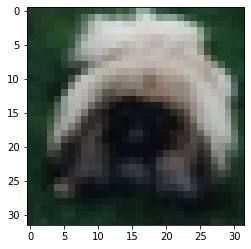

In [7]:
plt.imshow(X_train[5201])

In [8]:
K = len(np.unique(y_train))

In [11]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [27]:
i = Input(shape=X_train[0].shape)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)



x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3024 - accuracy: 0.5529 - val_loss: 1.1174 - val_accuracy: 0.6194
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8400 - accuracy: 0.7114 - val_loss: 0.8323 - val_accuracy: 0.7227
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6858 - accuracy: 0.7661 - val_loss: 0.7402 - val_accuracy: 0.7546
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5757 - accuracy: 0.8018 - val_loss: 0.6486 - val_accuracy: 0.7855
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4881 - accuracy: 0.8308 - val_loss: 0.6871 - val_accuracy: 0.7780
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4156 - accuracy: 0.8558 - val_loss: 0.6073 - val_accuracy: 0.8123
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3493 - accuracy: 0.8783 - val_loss: 0.7116 - val_accuracy:

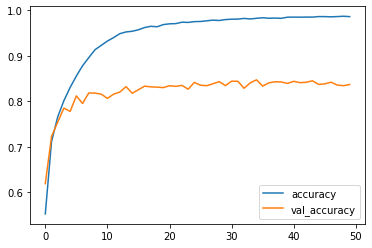

In [30]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

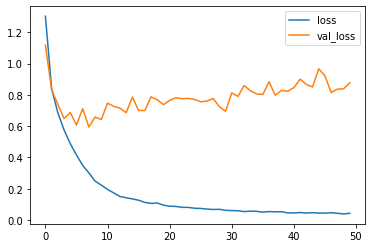

In [31]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Confusion matrix, without normalization
[[878   8  20  14   4   9   5   4  35  23]
 [  6 925   5   2   0   2   2   0  12  46]
 [ 45   1 727  54  49  56  44  12   8   4]
 [ 20   6  29 708  27 153  33  11   3  10]
 [ 10   3  31  85 748  53  34  31   4   1]
 [  6   3  19 108  13 818  12  19   1   1]
 [  6   4  18  46  10  24 879   6   4   3]
 [  9   1   7  40  26  45   2 859   4   7]
 [ 35  16   3   5   2   2   6   1 916  14]
 [ 12  38   1  10   0   3   3   4  15 914]]


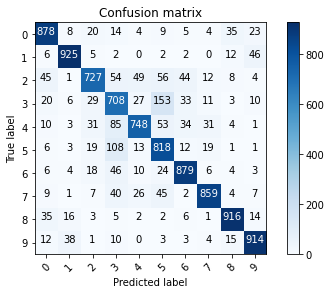

In [32]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [33]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)       

In [34]:
i = Input(shape=X_train[0].shape)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)



x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)

In [40]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [42]:
r = model2.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.4267 - accuracy: 0.5010 - val_loss: 1.3730 - val_accuracy: 0.5368
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.9971 - accuracy: 0.6527 - val_loss: 0.9148 - val_accuracy: 0.6857
Epoch 3/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.8438 - accuracy: 0.7103 - val_loss: 0.9090 - val_accuracy: 0.6967
Epoch 4/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7537 - accuracy: 0.7429 - val_loss: 0.8821 - val_accuracy: 0.7055
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6826 - accuracy: 0.7666 - val_loss: 0.6985 - val_accuracy: 0.7709
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6328 - accuracy: 0.7834 - val_loss: 0.6251 - val_accuracy: 0.7876
Epoch 7/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.5881 - accuracy: 0.7997 - val_loss: 0.5684 -

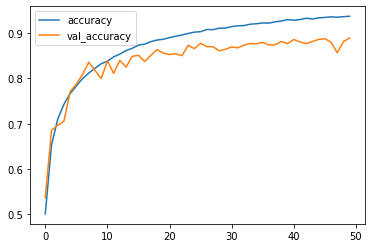

In [43]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

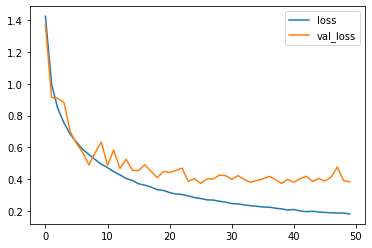

In [44]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()